## Spark's Pandas Dataframe

In [ ]:
################ template to run PySpark V3.5.1 on Colab #######################

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/spark_pandas.png" width="1200">



In [1]:
# Install pyspark
!pip install pyspark -q
!pip install findspark -q

In [3]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [4]:
# Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

In [5]:
import findspark
findspark.init()

In [ ]:
################ end template PySpark on Colab ##########################

# Spark 3 Preview Highlights
Using pySpark with Google Colab & Spark 3.0 preview Deep Learning: Adds GPU Support
It supports heterogeneous GPUs like AMD, Intel, and Nvidia. For Kubernetes, it offers GPU isolation at the executor pod level.

In addition to this we get:
- GPU acceleration for Pandas UDF.
- You can specify the number of GPUs in your RDD
operations.
- To easily specify a Deep Learning environment there is YARN and Docker support to launch Spark 3.0 with GPU.

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Test the spark
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(8, False)

+-----+
|hello|
+-----+
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
+-----+
only showing top 8 rows



# Spark-ifying Pandas: Spark's Pandas with Google Colab


In [7]:
# Import a Spark function from library
from pyspark.sql.functions import col, pandas_udf, PandasUDFType
from pyspark.sql.types import *

In [8]:
import pandas as pd
import numpy as np

In [9]:
# Create a pandas DataFrame
df_pandas = pd.DataFrame({'A': np.random.rand(5),
                          'B': np.random.rand(5),
                          })
df_pandas

,A,B
0,0.299789,0.539644
1,0.928724,0.005715
2,0.242318,0.386722
3,0.068524,0.550268
4,0.219546,0.171782


In [11]:
# Import Pandas Spark
import pyspark.pandas as ps

# Create a Spark Pandas DataFrame
df = ps.DataFrame({'A': np.random.rand(5),
                   'B': np.random.rand(5)
                    })
df

,A,B
0,0.301706,0.574730
1,0.958074,0.625717
2,0.658297,0.117500
3,0.388014,0.929567
4,0.730459,0.752743


In [13]:
type(df)

pyspark.pandas.frame.DataFrame

In [15]:
#Likewise, the order of indices can be sorted by DataFrame.sort_index().
df.sort_index()

,A,B
0,0.301706,0.574730
1,0.958074,0.625717
2,0.658297,0.117500
3,0.388014,0.929567
4,0.730459,0.752743


In [16]:
df.head(2)

,A,B
0,0.301706,0.574730
1,0.958074,0.625717


In [17]:
#A quick statistical summary of a Spark Pandas DataFrame can be displayed using DataFrame.describe().
df.describe()

,A,B
count,5.000000,5.000000
mean,0.607310,0.600051
std,0.265653,0.302511
min,0.301706,0.117500
25%,0.388014,0.574730
50%,0.658297,0.625717
75%,0.730459,0.752743
max,0.958074,0.929567


In [18]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      float64
dtypes: float64(2)

In [19]:
#Sorting a Spark Pandas DataFrame can be done using DataFrame.sort_values().
df.sort_values(by='B')

,A,B
2,0.658297,0.117500
0,0.301706,0.574730
1,0.958074,0.625717
4,0.730459,0.752743
3,0.388014,0.929567


In [20]:
#Transposing a Spark Pandas DataFrame can be done using DataFrame.transpose().
df.transpose()

,0,1,2,3,4
A,0.301706,0.958074,0.658297,0.388014,0.730459
B,0.574730,0.625717,0.117500,0.929567,0.752743


In [21]:
#As with a pandas DataFrame, selecting a single column from a Koalas DataFrame returns a Series.
df['A']

0    0.301706
1    0.958074
2    0.658297
3    0.388014
4    0.730459
Name: A, dtype: float64

In [22]:
#Selecting multiple columns from a Spark Pandas DataFrame returns a Koalas DataFrame.
df[['A', 'B']]

,A,B
0,0.301706,0.574730
1,0.958074,0.625717
2,0.658297,0.117500
3,0.388014,0.929567
4,0.730459,0.752743


In [23]:
#Slicing is available for selecting rows from a Spark Pandas DataFrame.
df.loc[1:2]

,A,B
1,0.958074,0.625717
2,0.658297,0.117500


In [24]:
#Slicing rows and columns is also available.
df.iloc[:3, 1:2]

,B
0,0.574730
1,0.625717
2,0.117500


Applying a Python Function to Koalas DataFrame
DataFrame.apply() is a very powerful function favored by many pandas users. Koalas DataFrames also support this function.

In [25]:
df.apply(np.cumsum)

,A,B
0,0.301706,0.574730
1,1.259779,1.200447
2,1.918077,1.317947
3,2.306090,2.247514
4,3.036549,3.000257


In [26]:
#DataFrame.apply() also works for axis = 1 or ‘columns’ (0 or ‘index’ is the default).
df.apply(np.cumsum, axis=1)

,A,B
0,0.301706,0.876436
1,0.958074,1.583791
2,0.658297,0.775797
3,0.388014,1.317581
4,0.730459,1.483202


In [27]:
#Also, a Python native function can be applied to a Spark Pandas DataFrame.
df.apply(lambda x: x ** 2)

,A,B
0,0.091026,0.330314
1,0.917905,0.391522
2,0.433355,0.013806
3,0.150555,0.864095
4,0.533570,0.566622


In [28]:
def square(x) -> ps.Series[np.float64]:
    return x ** 2

df.apply(square)

,A,B
0,0.091026,0.330314
1,0.917905,0.391522
2,0.433355,0.013806
3,0.150555,0.864095
4,0.533570,0.566622


In [29]:
'''Note that DataFrame.apply() in Spark Pandas does not support global aggregations by its design.
However, If the size of data is lower than compute.shortcut_limit,
it might work because it uses pandas as a shortcut execution. '''

'Note that DataFrame.apply() in Spark Pandas does not support global aggregations by its design.\nHowever, If the size of data is lower than compute.shortcut_limit,\nit might work because it uses pandas as a shortcut execution. '

In [30]:
# Working properly since size of data <= compute.shortcut_limit (1000)
ps.DataFrame({'A': range(1000)}).apply(lambda col: col.max())

A    999
dtype: int64

In [31]:
ps.DataFrame({'A': range(1001)}).apply(lambda col: col.max())

A     499
A    1000
dtype: int64

In [32]:
ps.set_option('compute.shortcut_limit', 1001)

In [33]:
ps.DataFrame({'A': range(1001)}).apply(lambda col: col.max())

A    1000
dtype: int64

Grouping Data
Grouping data by columns is one of the common APIs in pandas. DataFrame.groupby() is available in Koalas as well.

In [34]:
df.groupby('A').sum()

,B
A,
0.958074,0.625717
0.301706,0.574730
0.388014,0.929567
0.730459,0.752743
0.658297,0.117500


In [35]:
#See also grouping data by multiple columns below.
df.groupby(['A', 'B']).sum()

,
A,B
0.958074,0.625717
0.301706,0.574730
0.658297,0.117500
0.730459,0.752743
0.388014,0.929567


## Plotting and Visualizing Data
In pandas, DataFrame.plot is a good solution for visualizing data. It can be used in the same way in Koalas.

Note that Koalas leverages approximation for faster rendering. Therefore, the results could be slightly different when the number of data is larger than plotting.max_rows.

See the example below that plots a Koalas DataFrame as a bar chart with DataFrame.plot.bar().

In [36]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
          'rabbit', 'giraffe', 'coyote', 'horse']
pdf = ps.DataFrame({'speed': speed,
                     'lifespan': lifespan}, index=index)
pdf.plot.bar()

Also, The horizontal bar plot is supported with DataFrame.plot.barh()



In [37]:
df.plot.barh()

In [38]:
#Make a pie plot using DataFrame.plot.pie().
df = ps.DataFrame({'mass': [0.330, 4.87, 5.97],
                     'radius': [2439.7, 6051.8, 6378.1]},
                    index=['Mercury', 'Venus', 'Earth'])
df.plot.pie(y='mass')

In [39]:
#Make a stacked area plot using DataFrame.plot.area().
df = ps.DataFrame({
     'sales': [3, 2, 3, 9, 10, 6, 3],
     'signups': [5, 5, 6, 12, 14, 13, 9],
     'visits': [20, 42, 28, 62, 81, 50, 90], },
      index=pd.date_range(start='2019/08/15', end='2020/03/09',freq='M'))
df.plot.area()

In [40]:
#Make line charts using DataFrame.plot.line().
df = ps.DataFrame({'pig': [20, 18, 489, 675, 1776],
                     'horse': [4, 25, 281, 600, 1900]},
                    index=[1990, 1997, 2003, 2009, 2014])
df.plot.line()

In [41]:
#Make a histogram using DataFrame.plot.hist()
df = pd.DataFrame(
     np.random.randint(1, 7, 6000),
     columns=['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
df = ps.from_pandas(df)
df.plot.hist(bins=12, alpha=0.5)

In [42]:
#Make a scatter plot using DataFrame.plot.scatter()
df = ps.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                     [6.4, 3.2, 1], [5.9, 3.0, 2]],
                    columns=['length', 'width', 'species'])
df.plot.scatter(x='length', y='width', c='species')#, colormap='viridis')


In [43]:
# Downloading the clustering dataset
!wget -q 'https://raw.githubusercontent.com/amjadraza/blogs-data/master/spark_ml/ccpp.csv'

In [44]:
# Read the data
psdf_ccpp = ps.read_csv("ccpp.csv")
psdf_ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [45]:
# Just Converting to display the simple plot to be published on Medium
pd_ccpp = psdf_ccpp.to_pandas()

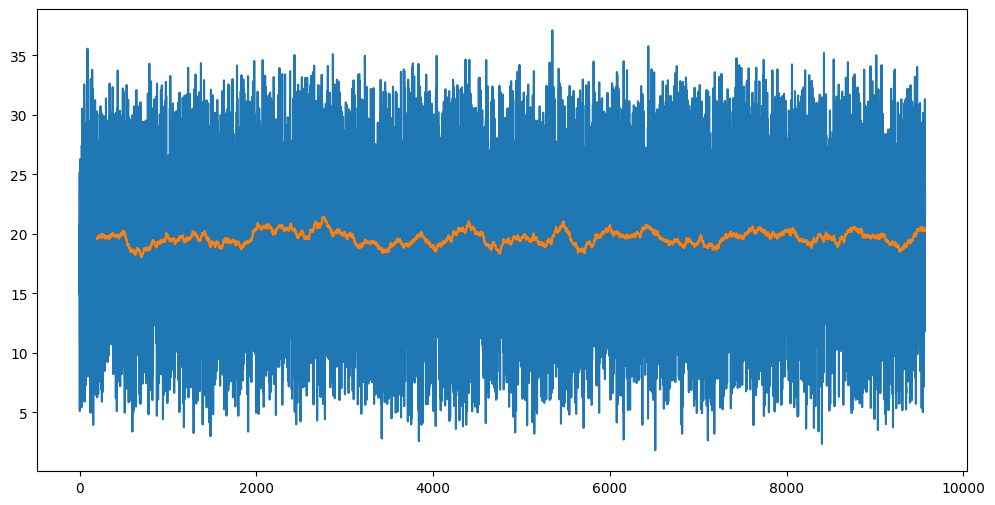

In [46]:
# Plotting the variables
pd_ccpp['AT'].plot(figsize = (12,6))
pd_ccpp['AT'].rolling(window=200).mean().plot();

<Axes: >

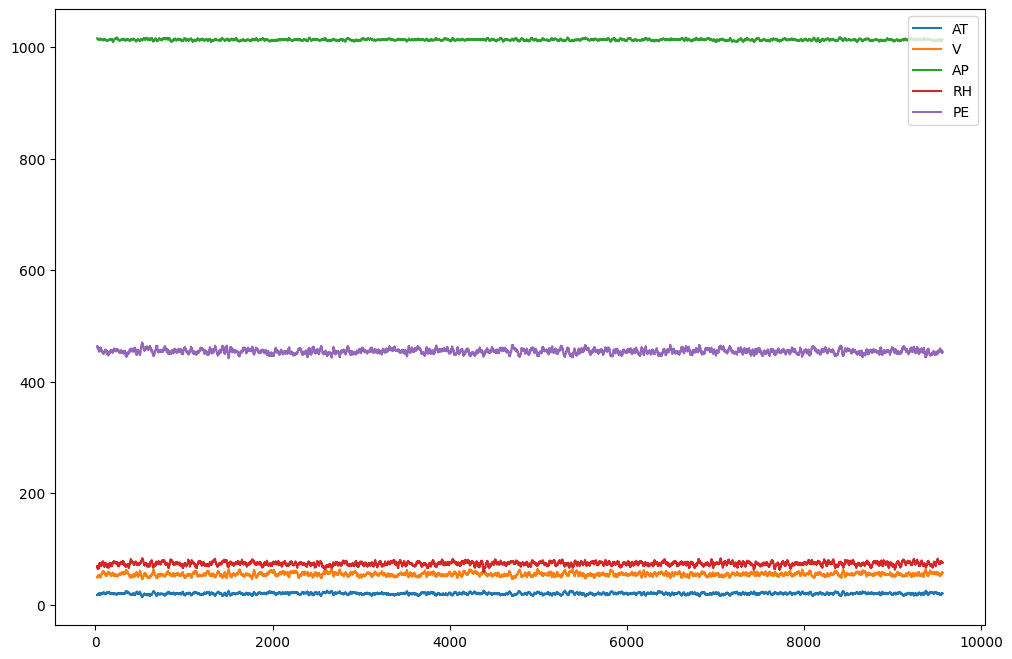

In [47]:
pd_ccpp.rolling(window=20).mean().plot(figsize=(12,8))

# Try below
# psdf_ccpp.rolling(window=20).plot()

In [ ]:
psdf_ccpp.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.320000,439.750000
50%,20.340000,52.080000,1012.940000,74.960000,451.510000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


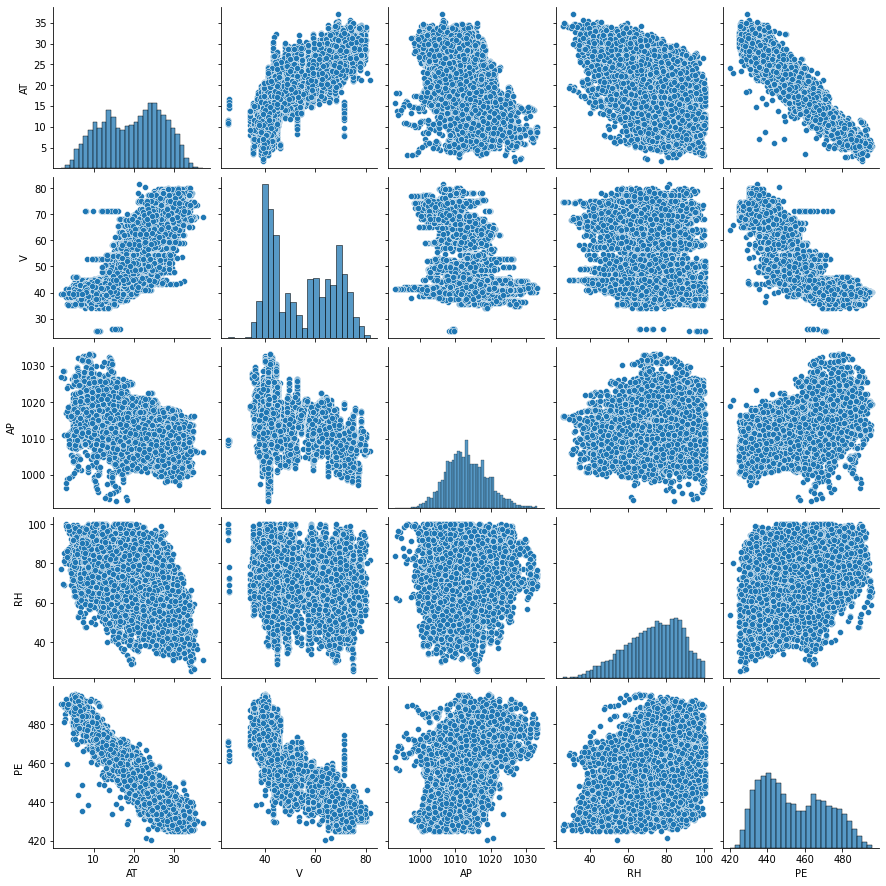

In [ ]:
import seaborn as sns
sns.pairplot(psdf_ccpp.to_pandas())

By looking at the above figure, we can see a lot of outliers and for some variable relationship with Target is not clear. To remove the outliers, the simplest solution is to calculate the moving average and I demonstrate usinf spark dataframe

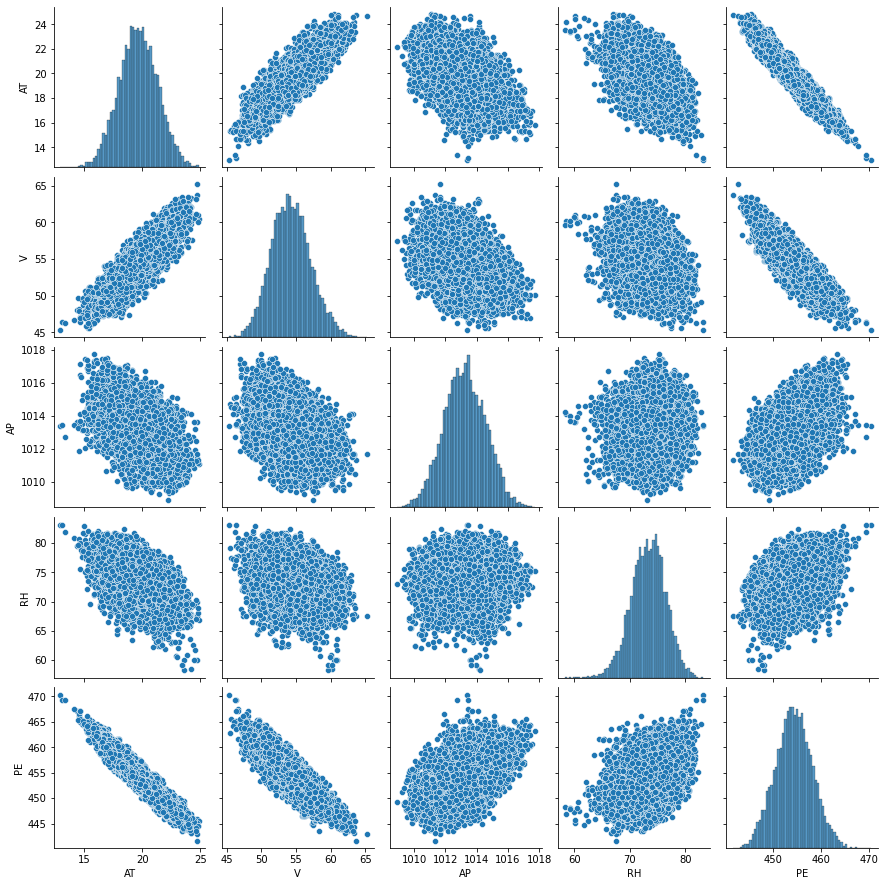

In [ ]:
sns.pairplot(psdf_ccpp.rolling(window=20).mean().to_pandas())

In [ ]:
# Create the moving average features
psdf_features = psdf_ccpp.rolling(window=20, min_periods=1).mean()
# Convert the spark pandas DataFrame into Spark DataFrame
sdf = psdf_features.to_spark()
sdf.show(5,False)

+------------------+------+------------------+-----------------+-----------------+
|AT                |V     |AP                |RH               |PE               |
+------------------+------+------------------+-----------------+-----------------+
|14.96             |41.76 |1024.07           |73.17            |463.26           |
|20.07             |52.36 |1022.055          |66.125           |453.815          |
|15.083333333333334|48.04 |1018.7566666666667|74.79666666666667|465.3966666666667|
|16.5275           |50.36 |1016.6275         |75.2575          |460.6675         |
|15.386000000000001|47.788|1015.1479999999999|79.53            |463.314          |
+------------------+------+------------------+-----------------+-----------------+
only showing top 5 rows



### Convert

In [ ]:
kidx = df.index
kidx.to_pandas().to_list()
[0, 1, 2, 3, 4]

[0, 1, 2, 3, 4]

In [ ]:
df = ps.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'F': 'foo'})
df

,A,B,C,D,F
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [ ]:
i = pd.date_range('2018-04-09', periods=2000, freq='1D1min')
ts = ps.DataFrame({'A': ['timestamp']}, index=i)
#ts.between_time('0:15', '0:16')  ## ERROR

### Using SQL in pyspark pandas
Koalas supports standard SQL syntax with ks.sql() which allows executing Spark SQL query and returns the result as a Koalas DataFrame.

In [ ]:
df = ps.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                     'pig': [20, 18, 489, 675, 1776],
                     'horse': [4, 25, 281, 600, 1900]})

df

,year,pig,horse
0,1990,20,4
1,1997,18,25
2,2003,489,281
3,2009,675,600
4,2014,1776,1900


In [ ]:
#ps.sql(f"SELECT * FROM {df} WHERE pig > 100")
# ps.sql(f"SELECT * FROM {df}")

In [ ]:
# #Also, mixing Koalas DataFrame and pandas DataFrame is supported in a join operation.
# pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
#                      'sheep': [22, 50, 121, 445, 791],
#                      'chicken': [250, 326, 589, 1241, 2118]})
# ks.sql('''
#      SELECT ks.pig, pd.chicken
#      FROM {kdf} ks INNER JOIN {pdf} pd
#      ON ks.year = pd.year
#      ORDER BY ks.pig, pd.chicken''')

### Conversion from and to PySpark DataFrame
A Koalas DataFrame can be easily converted to a PySpark DataFrame using DataFrame.to_spark(), similar to DataFrame.to_pandas().

In [ ]:
df = ps.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})
sdf = df.to_spark()
type(sdf)

pyspark.sql.dataframe.DataFrame

In [ ]:
sdf.show()

+---+---+
|  A|  B|
+---+---+
|  1| 10|
|  2| 20|
|  3| 30|
|  4| 40|
|  5| 50|
+---+---+



## from pyspark to SparkPandas

In [ ]:
sdf.to_pandas_on_spark(index_col='A')

,B
A,
1,10
2,20
3,30
4,40
5,50


# Object Creation


In [ ]:
df = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])
df

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [ ]:
#Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)

In [ ]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
pdf

,A,B,C,D
2013-01-01,-0.243463,-1.183518,1.378473,0.484077
2013-01-02,0.355620,0.736820,-0.804558,-0.932142
2013-01-03,-0.354799,0.104936,0.528577,0.121916
2013-01-04,0.492525,1.486192,1.243113,0.270341
2013-01-05,0.794163,0.272112,0.503347,-0.060785
2013-01-06,-0.700684,-0.860652,1.049820,0.230231


In [ ]:
df = ps.from_pandas(pdf)

In [ ]:
type(df)

pyspark.pandas.frame.DataFrame

In [ ]:
df

,A,B,C,D
2013-01-01,-0.243463,-1.183518,1.378473,0.484077
2013-01-02,0.355620,0.736820,-0.804558,-0.932142
2013-01-03,-0.354799,0.104936,0.528577,0.121916
2013-01-04,0.492525,1.486192,1.243113,0.270341
2013-01-05,0.794163,0.272112,0.503347,-0.060785
2013-01-06,-0.700684,-0.860652,1.049820,0.230231


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.

Creating a Spark DataFrame from pandas DataFrame

In [ ]:
spark = SparkSession.builder.getOrCreate()

In [ ]:
sdf = spark.createDataFrame(pdf)

In [ ]:
sdf.show()

+--------------------+-------------------+-------------------+--------------------+
|                   A|                  B|                  C|                   D|
+--------------------+-------------------+-------------------+--------------------+
|-0.24346286485747057|-1.1835178510694193| 1.3784727978102855| 0.48407696128581273|
| 0.35562022143430416| 0.7368195949506308|-0.8045584107457658|  -0.932142462335458|
| -0.3547990729742396|0.10493581548540831| 0.5285770649960256| 0.12191567059198327|
| 0.49252479320116677| 1.4861915077179118| 1.2431129924675306|   0.270340965945731|
|  0.7941633588917075|0.27211211145562436| 0.5033465702685708|-0.06078481684905557|
| -0.7006842191816878|-0.8606524126664674| 1.0498198962580836|  0.2302309482433421|
+--------------------+-------------------+-------------------+--------------------+



Creating Koalas DataFrame from Spark DataFrame. to_koalas() is automatically attached to Spark DataFrame and available as an API when Koalas is imported.



In [ ]:
df = sdf.to_pandas_on_spark()
df

,A,B,C,D
0,-0.243463,-1.183518,1.378473,0.484077
1,0.355620,0.736820,-0.804558,-0.932142
2,-0.354799,0.104936,0.528577,0.121916
3,0.492525,1.486192,1.243113,0.270341
4,0.794163,0.272112,0.503347,-0.060785
5,-0.700684,-0.860652,1.049820,0.230231


In [ ]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

#Viewing Data
See the API Reference.

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not ordered, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use .loc or iloc instead.

In [ ]:
df.head()

,A,B,C,D
0,-0.243463,-1.183518,1.378473,0.484077
1,0.355620,0.736820,-0.804558,-0.932142
2,-0.354799,0.104936,0.528577,0.121916
3,0.492525,1.486192,1.243113,0.270341
4,0.794163,0.272112,0.503347,-0.060785


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [ ]:
df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.to_numpy()

array([[-0.24346286, -1.18351785,  1.3784728 ,  0.48407696],
       [ 0.35562022,  0.73681959, -0.80455841, -0.93214246],
       [-0.35479907,  0.10493582,  0.52857706,  0.12191567],
       [ 0.49252479,  1.48619151,  1.24311299,  0.27034097],
       [ 0.79416336,  0.27211211,  0.50334657, -0.06078482],
       [-0.70068422, -0.86065241,  1.0498199 ,  0.23023095]])

In [ ]:
#Describe shows a quick statistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.057227,0.092648,0.649795,0.018940
std,0.575536,0.992639,0.799287,0.499143
min,-0.700684,-1.183518,-0.804558,-0.932142
25%,-0.354799,-0.860652,0.503347,-0.060785
50%,-0.243463,0.104936,0.528577,0.121916
75%,0.492525,0.736820,1.243113,0.270341
max,0.794163,1.486192,1.378473,0.484077


In [ ]:
#Transposing your data
df.T

,0,1,2,3,4,5
A,-0.243463,0.355620,-0.354799,0.492525,0.794163,-0.700684
B,-1.183518,0.736820,0.104936,1.486192,0.272112,-0.860652
C,1.378473,-0.804558,0.528577,1.243113,0.503347,1.049820
D,0.484077,-0.932142,0.121916,0.270341,-0.060785,0.230231


In [ ]:
#Sorting by its index
df.sort_index(ascending=False)

,A,B,C,D
5,-0.700684,-0.860652,1.049820,0.230231
4,0.794163,0.272112,0.503347,-0.060785
3,0.492525,1.486192,1.243113,0.270341
2,-0.354799,0.104936,0.528577,0.121916
1,0.355620,0.736820,-0.804558,-0.932142
0,-0.243463,-1.183518,1.378473,0.484077


In [ ]:
#Sorting by value
df.sort_values(by='B')

,A,B,C,D
0,-0.243463,-1.183518,1.378473,0.484077
5,-0.700684,-0.860652,1.049820,0.230231
2,-0.354799,0.104936,0.528577,0.121916
4,0.794163,0.272112,0.503347,-0.060785
1,0.355620,0.736820,-0.804558,-0.932142
3,0.492525,1.486192,1.243113,0.270341


#Missing Data
Koalas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [ ]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [ ]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [ ]:
df1 = ps.from_pandas(pdf1)
df1

,A,B,C,D,E
2013-01-01,-0.243463,-1.183518,1.378473,0.484077,1.0
2013-01-02,0.355620,0.736820,-0.804558,-0.932142,1.0
2013-01-03,-0.354799,0.104936,0.528577,0.121916,NaN
2013-01-04,0.492525,1.486192,1.243113,0.270341,NaN


To drop any rows that have missing data.


In [ ]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.243463,-1.183518,1.378473,0.484077,1.0
2013-01-02,0.355620,0.736820,-0.804558,-0.932142,1.0


In [ ]:
#Filling missing data.
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.243463,-1.183518,1.378473,0.484077,1.0
2013-01-02,0.355620,0.736820,-0.804558,-0.932142,1.0
2013-01-03,-0.354799,0.104936,0.528577,0.121916,5.0
2013-01-04,0.492525,1.486192,1.243113,0.270341,5.0


## Operations
Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [ ]:
df.mean()

A    0.057227
B    0.092648
C    0.649795
D    0.018940
dtype: float64

### Getting data in/out
See the Input/Output docs.

###CSV
CSV is straightforward and easy to use. See here to write a CSV file and here to read a CSV file.

In [ ]:
df.to_csv('foo.csv')
ps.read_csv('foo.csv').head(10)

,A,B,C,D
0,-0.243463,-1.183518,1.378473,0.484077
1,0.355620,0.736820,-0.804558,-0.932142
2,-0.354799,0.104936,0.528577,0.121916
3,0.492525,1.486192,1.243113,0.270341
4,0.794163,0.272112,0.503347,-0.060785
5,-0.700684,-0.860652,1.049820,0.230231


### Parquet
Parquet is an efficient and compact file format to read and write faster. See here to write a Parquet file and here to read a Parquet file.

In [ ]:
df.to_parquet('bar.parquet')
ps.read_parquet('bar.parquet').head(10)

,A,B,C,D
0,0.492525,1.486192,1.243113,0.270341
1,0.794163,0.272112,0.503347,-0.060785
2,-0.700684,-0.860652,1.049820,0.230231
3,-0.243463,-1.183518,1.378473,0.484077
4,0.355620,0.736820,-0.804558,-0.932142
5,-0.354799,0.104936,0.528577,0.121916


In [ ]:
pdf= pd.DataFrame({'x': range(3),'y':['a','b','b'],'z':['a','b','b']})

### Create Koala Dataframe
df = ps.from_pandas(pdf)

## Rename the columns
df.columns = ['x','y','z1']

# Do some operations in place:
df['x2'] = df.x*df.x


In [ ]:
df

,x,y,z1,x2
0,0,a,a,0
1,1,b,b,1
2,2,b,b,4


In [ ]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession

In [ ]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [ ]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
type(s)

pyspark.pandas.series.Series

In [ ]:
pdf = pd.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

df = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [ ]:
pdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [ ]:
df

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [ ]:
dates = pd.date_range('20130101', periods=6)
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [ ]:
# Covert pandas data frmae in koalas and spark
df = ps.from_pandas(pdf)

In [ ]:
spark = SparkSession.builder.getOrCreate()
sdf = spark.createDataFrame(pdf)
type(sdf)

pyspark.sql.dataframe.DataFrame

In [ ]:
type(pdf), type(df), type(sdf)

(pandas.core.frame.DataFrame,
 pyspark.pandas.frame.DataFrame,
 pyspark.sql.dataframe.DataFrame)

In [ ]:
df.head()

,A,B,C,D
2013-01-01,-1.271404,-0.697980,0.149909,-1.077566
2013-01-02,0.496513,0.941149,0.080770,-0.280419
2013-01-03,-0.403752,-1.300983,-0.816458,0.200782
2013-01-04,0.737107,0.325507,0.427706,1.745208
2013-01-05,-0.114216,-0.016423,0.154859,-0.200907


In [ ]:
import matplotlib.pyplot as plt

df.cumsum().plot()

##Spark Configuration with Koalas
Since koalas is wrapper around spark, the spark configuration will impact koalas directly. You may tune the spark.cong.get parameters when working with Koalas.

In [ ]:
## Spark Configuration

prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ps.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [ ]:
# timeit with arrow.enabled
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ps.range(300000).to_pandas()

408 ms ± 96.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ps.range(300000).to_pandas()

In [ ]:
# Restore Default
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

### Saving and Reading Data
Koalas work very well saving and reading data in .csv, .parquet and .orc.

In [ ]:
# csv
df.to_csv('foo.csv')
ps.read_csv('foo.csv').head(10)

# parquet
df.to_parquet('bar.parquet')
ps.read_parquet('bar.parquet').head(10)

# spark orc
df.to_spark_io('zoo.orc', format="orc")
ps.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,-1.271404,-0.697980,0.149909,-1.077566
1,0.496513,0.941149,0.080770,-0.280419
2,-0.403752,-1.300983,-0.816458,0.200782
3,0.737107,0.325507,0.427706,1.745208
4,-0.114216,-0.016423,0.154859,-0.200907
5,-0.440440,0.886090,-0.728171,1.700258
